In [11]:
%load_ext autoreload
%autoreload 2

In [17]:
#Import packages
import os
import glob
import json
#from tqdm import tqdm

import nilearn
import nibabel as nib
from nilearn import image as nimg
from nilearn import plotting as nplot
from nilearn.glm.first_level import FirstLevelModel, make_first_level_design_matrix, run_glm
from nilearn.glm import fdr_threshold,threshold_stats_img
from nilearn.glm.contrasts import compute_contrast


from bids.layout import BIDSLayout, parse_file_entities

# import cortex
# from cortex import fmriprep

from nipype.interfaces.workbench.base import WBCommand
from nipype.algorithms import modelgen
from nipype.interfaces.base import Bunch

import hcp_utils as hcp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

import first_level_sparse_scanning as flss 
import importlib
importlib.reload(flss)


<module 'first_level_sparse_scanning' from '/net/vast-storage.ib.cluster/scratch/scratch/Fri/rfbrito/bids/code/nilearn/first_level_sparse_scanning.py'>

In [3]:
root = '../../derivatives/events_sweep'
sub = 'voice880'
ses = '1'
task = 'nwr'
run = '1'

# glob.glob(f'/nese/mit/group/sig/om_projects/voice/bids/data/sub-{sub}/ses-{ses}/func/sub-{sub}*task-{task}*run-0{run}*events.tsv')
events_file = f'{root}/sub-{sub}_ses-{ses}_task-{task}_run-0{run}_events.tsv'
#base_events = pd.read_table(events_file[0])

all_confounds = pd.read_csv(f"../../derivatives/fmriprep/sub-{sub}/ses-{ses}/func/sub-{sub}_ses-{ses}_task-{task}_run-{run}_desc-confounds_timeseries.tsv", sep = '\t')
len([col for col in all_confounds.columns if 'a_comp_cor' in col])

bids_item = [parse_file_entities(events_file)]

In [19]:
return_type = 'z_score'
contrast_maps = flss.convolve_sparse_scan_glm_with_cifti(bids_item, return_type)

/om2/user/rfbrito/miniconda/envs/imaging_with_statsmodel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `nonword` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "
/om2/user/rfbrito/miniconda/envs/imaging_with_statsmodel/lib/python3.11/site-packages/nilearn/glm/first_level/first_level.py:61: UserWarning: Mean values of 0 observed.The data have probably been centered.Scaling might not work as expected
  warn('Mean values of 0 observed.'


231023-12:01:51,555 nipype.interface INFO:
	 Setting dt = 110 ms

231023-12:01:51,556 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231023-12:01:51,557 nipype.interface INFO:
	 reg_scale: 43.1973
231023-12:01:51,559 nipype.interface INFO:
	 Setting dt = 110 ms

231023-12:01:51,560 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231023-12:01:51,560 nipype.interface INFO:
	 reg_scale: 43.1973
231023-12:01:51,562 nipype.interface INFO:
	 Setting dt = 110 ms

231023-12:01:51,563 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231023-12:01:51,564 nipype.interface INFO:
	 reg_scale: 43.1973
231023-12:01:51,566 nipype.interface INFO:
	 Setting dt = 110 ms

231023-12:01:51,567 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231023-12:01:51,567 nipype.interface INFO:
	 reg_scale: 43.1973
231023-12:01:51,569 nipype.interface INFO:
	 Setting dt = 110 ms

231023-12:01:51,570 nipype.interface INFO:
	 response sum: 1.0000 max: 0.0231
231023-12:01:51,571 nipy

/om2/user/rfbrito/miniconda/envs/imaging_with_statsmodel/lib/python3.11/site-packages/nilearn/glm/first_level/experimental_paradigm.py:89: UserWarning: Unexpected column `nonword` in events data will be ignored.
  warnings.warn(("Unexpected column `{}` in events "


In [21]:
c

'sub-voice880_ses-1_task-nwr_run-1'

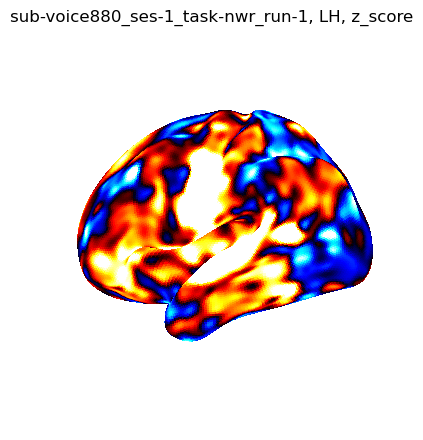

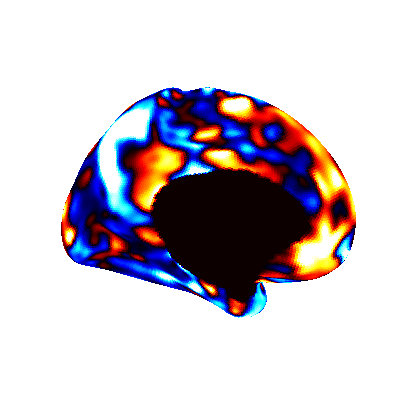

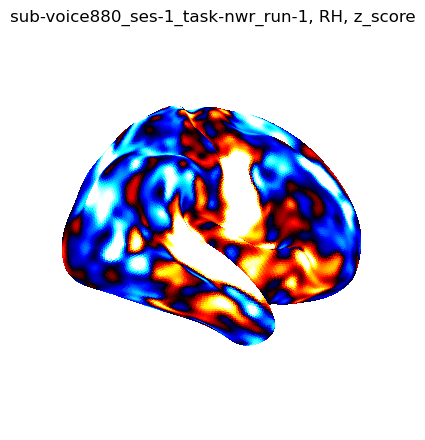

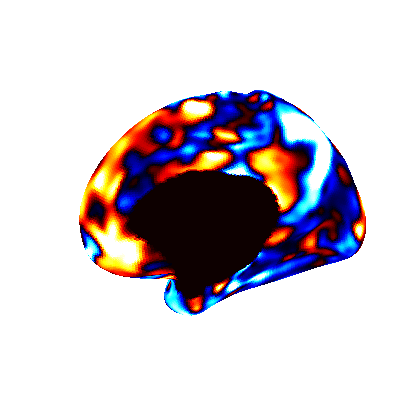

In [23]:
vmax = 3
for c in contrast_maps.columns:
    
    title = c
    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='left', #threshold=thresholds[c],
        symmetric_cbar = False,
        colorbar=False,
        title = f'{title}, LH, {return_type}', #output_file=f'{root}/{c}_hemi-LH_view-lateral.png',
        title_font_size=30, vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_left, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='right', #threshold=thresholds[c],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-LH_view-medial.png',
        colorbar=False, vmax = vmax,  
        bg_map=hcp.mesh.sulc_left)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated, hcp.cortex_data(contrast_maps[c]), hemi='right', #threshold=thresholds[covariate],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-lateral.png',
        colorbar=False,
        title = f'{title}, RH, {return_type}', vmax = vmax,
        bg_map=hcp.mesh.sulc)

    nplot.plot_surf_stat_map(
        hcp.mesh.inflated_right, hcp.left_cortex_data(contrast_maps[c]), view= 'lateral',
        hemi='left', #threshold=thresholds[covariate],
        symmetric_cbar = False, #output_file=f'{root}/{c}_hemi-RH_view-medial.png',
        colorbar=False, vmax = vmax,
        bg_map=hcp.mesh.sulc_right)
    
    nplot.show()